# Imports

In [1]:
import pandas as pd
import numpy as np
import os 
import xml.etree.ElementTree as ET
from lxml import objectify

import tensorflow as tf
from tensorflow import keras



from glob import glob

import cv2
import matplotlib.pylab as plt



# To Avoid errors


In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'   #this one solves a dead kernel problem

In [3]:
physical_devices = tf.config.list_physical_devices('GPU') #finds one GPU and one CPU
physical_devices[0]

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

In [4]:
#avoiding out of memory (OOM) errors
#tf.config.experimental.set_memory_growth(physical_devices[0], True)


# Data preparation

In [5]:
# Reading in Images
defect_img_dir = glob('images/images/All_images/*.jpg')
defect_img_dir

['images/images/All_images\\img_01_3402617700_00001.jpg',
 'images/images/All_images\\img_01_3402617700_01009.jpg',
 'images/images/All_images\\img_01_3436789500_00004.jpg',
 'images/images/All_images\\img_01_3436814600_00259.jpg',
 'images/images/All_images\\img_01_3436815300_00473.jpg',
 'images/images/All_images\\img_01_3436815300_00477.jpg',
 'images/images/All_images\\img_01_3436815300_00478.jpg',
 'images/images/All_images\\img_01_3437011300_00918.jpg',
 'images/images/All_images\\img_01_424799300_01133.jpg',
 'images/images/All_images\\img_01_424799600_00001.jpg',
 'images/images/All_images\\img_01_424799600_00002.jpg',
 'images/images/All_images\\img_01_424825700_00001.jpg',
 'images/images/All_images\\img_01_424826100_00001.jpg',
 'images/images/All_images\\img_01_424826300_00950.jpg',
 'images/images/All_images\\img_01_424826800_00002.jpg',
 'images/images/All_images\\img_01_424826800_00003.jpg',
 'images/images/All_images\\img_01_424995500_00255.jpg',
 'images/images/All_ima

In [6]:
len(defect_img_dir) # 14 images are unlabaled 

2294

In [7]:
# dictionary; defect ID
dict_defect_ID = {
  "crease": 0,
  "crescent_gap": 1,
  "inclusion": 2,
  "oil_spot": 3,
  "punching_hole": 4,
  "rolled_pit": 5,
  "silk_spot": 6,
  "waist_folding": 7,
  "water_spot": 8,
  "welding_line": 9,
}

In [8]:
mydf = pd.read_csv('label/labels.csv', sep = ';')

In [9]:
mydf['defect_ID'] = mydf['defect'].map(dict_defect_ID)

In [10]:
def create_directory(filename):
    return 'images/images/All_images/' + filename

In [11]:
mydf['directory'] = mydf['filename'].apply(create_directory)

In [12]:
mydf

,filename,object.name,truncated,xmin,ymin,xmax,ymax,defect,defect_ID,directory
0,img_01_424799300_01133.jpg,3_yueyawan,1,1696,484,1911,1000,crescent_gap,1,images/images/All_images/img_01_424799300_0113...
1,img_01_424799600_00001.jpg,3_yueyawan,1,1688,1,1904,340,crescent_gap,1,images/images/All_images/img_01_424799600_0000...
2,img_01_424799600_00002.jpg,3_yueyawan,1,1667,781,1888,1000,crescent_gap,1,images/images/All_images/img_01_424799600_0000...
3,img_01_424825700_00001.jpg,3_yueyawan,1,1199,774,1391,1000,crescent_gap,1,images/images/All_images/img_01_424825700_0000...
4,img_01_424826100_00001.jpg,3_yueyawan,0,1210,716,1415,998,crescent_gap,1,images/images/All_images/img_01_424826100_0000...
...,...,...,...,...,...,...,...,...,...,...
3537,img_08_4406743300_00483.jpg,6_siban,0,690,260,840,675,silk_spot,6,images/images/All_images/img_08_4406743300_004...
3538,img_08_4406743300_00486.jpg,6_siban,0,959,484,1017,889,silk_spot,6,images/images/All_images/img_08_4406743300_004...
3539,img_08_4406743300_00698.jpg,6_siban,0,579,348,831,684,silk_spot,6,images/images/All_images/img_08_4406743300_006...
3540,img_08_4406743300_00699.jpg,6_siban,0,571,571,853,843,silk_spot,6,images/images/All_images/img_08_4406743300_006...


# Presenting the dataset


In [13]:
mydf['defect_ID'].value_counts()  #numbers of defects

defect_ID
6    884
3    569
9    506
8    352
2    344
4    325
1    263
7    142
5     83
0     74
Name: count, dtype: int64

<Axes: xlabel='defect'>

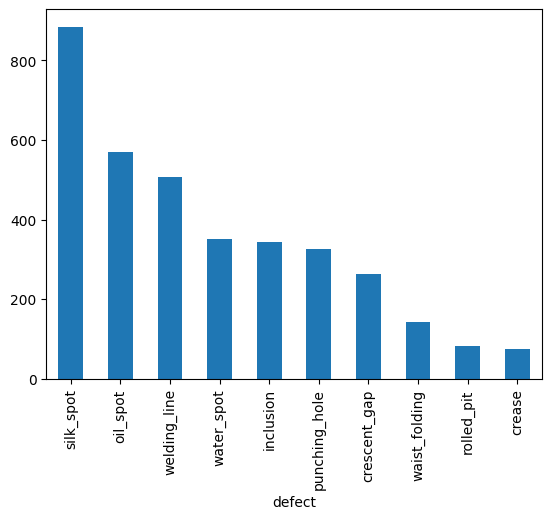

In [14]:
mydf['defect'].value_counts().plot(kind = 'bar')   #numbers of defects

<Axes: ylabel='count'>

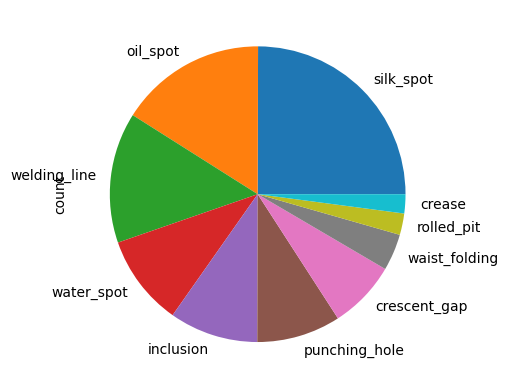

In [15]:
mydf['defect'].value_counts().plot(kind = 'pie')  #same as above but pie chart

In [16]:
filtered_mydf = mydf[mydf['filename'] == 'img_06_4406562900_00002.jpg' ]  #img_08_425508200_00361.jpg
filtered_mydf

,filename,object.name,truncated,xmin,ymin,xmax,ymax,defect,defect_ID,directory
2682,img_06_4406562900_00002.jpg,1_chongkong,0,1829,162,1940,228,punching_hole,4,images/images/All_images/img_06_4406562900_000...
2683,img_06_4406562900_00002.jpg,3_yueyawan,1,1,4,38,190,crescent_gap,1,images/images/All_images/img_06_4406562900_000...
2684,img_06_4406562900_00002.jpg,4_shuiban,0,1597,28,1811,928,water_spot,8,images/images/All_images/img_06_4406562900_000...
2685,img_06_4406562900_00002.jpg,2_hanfeng,1,37,3,2048,40,welding_line,9,images/images/All_images/img_06_4406562900_000...


In [17]:
xmin, ymin, xmax, ymax, defect, defect_ID = [filtered_mydf[col].values for col in ['xmin', 'ymin', 'xmax', 'ymax', 'defect', 'defect_ID']]


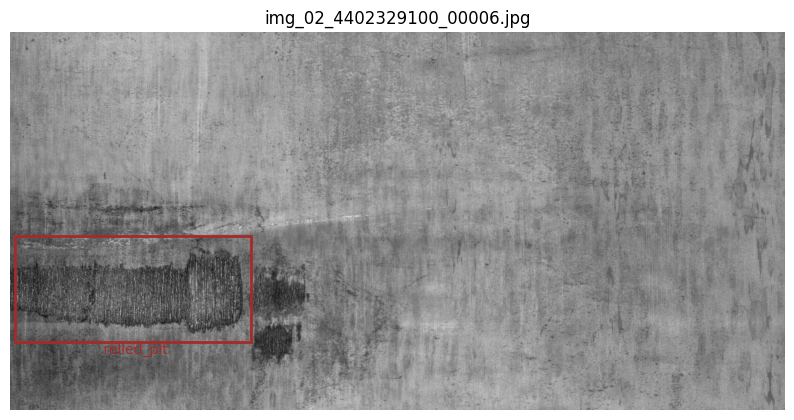

In [25]:
#function to show images with defects marked 
def show_defect(image_name, defect_labels = True):

    filtered_mydf = mydf[mydf['filename'] == image_name ]
    
    xmin, ymin, xmax, ymax, defect, defect_ID = [filtered_mydf[col].values for col in ['xmin', 'ymin', 'xmax', 'ymax', 'defect', 'defect_ID']]
    directory = filtered_mydf['directory'].values[0]
    img_mpl = plt.imread(directory)

    
        
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.imshow(img_mpl, cmap = 'gray')

    
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'darkblue', 'yellow', 'cyan']
    
    for i in range(len(xmin)):
        edgecolor = colors[defect_ID[i]]
        rectangle = plt.Rectangle((xmin[i],ymin[i]), width = xmax[i] - xmin[i],
                                  height = ymax[i] - ymin[i],
                                  facecolor = 'none', edgecolor = edgecolor, linewidth = 2
                                 )
        ax.add_patch(rectangle)
        if defect_labels:
            ax.text((xmin[i]+xmax[i])/2, ymax[i]+30, f' {defect[i]}', fontsize=10, ha='center', color=edgecolor)
    plt.axis('off')
    plt.title(image_name)
    
    plt.show
show_defect('img_02_4402329100_00006.jpg') #correct

# Creating csv for modeling

In [19]:
mydf['xmin_percent'] = mydf['xmin'] / 2048
mydf['ymin_percent'] = mydf['ymin'] / 1000
mydf['xmax_percent'] = mydf['xmax'] / 2048
mydf['ymax_percent'] = mydf['ymax'] / 1000

In [20]:
mydf.to_csv('dataset.csv', index=False, sep='\t')

In [21]:
df1 = pd.read_csv('dataset.csv', sep='\t')

In [22]:
df1 #ok

,filename,object.name,truncated,xmin,ymin,xmax,ymax,defect,defect_ID,directory,xmin_percent,ymin_percent,xmax_percent,ymax_percent
0,img_01_424799300_01133.jpg,3_yueyawan,1,1696,484,1911,1000,crescent_gap,1,images/images/All_images/img_01_424799300_0113...,0.828125,0.484,0.933105,1.000
1,img_01_424799600_00001.jpg,3_yueyawan,1,1688,1,1904,340,crescent_gap,1,images/images/All_images/img_01_424799600_0000...,0.824219,0.001,0.929688,0.340
2,img_01_424799600_00002.jpg,3_yueyawan,1,1667,781,1888,1000,crescent_gap,1,images/images/All_images/img_01_424799600_0000...,0.813965,0.781,0.921875,1.000
3,img_01_424825700_00001.jpg,3_yueyawan,1,1199,774,1391,1000,crescent_gap,1,images/images/All_images/img_01_424825700_0000...,0.585449,0.774,0.679199,1.000
4,img_01_424826100_00001.jpg,3_yueyawan,0,1210,716,1415,998,crescent_gap,1,images/images/All_images/img_01_424826100_0000...,0.590820,0.716,0.690918,0.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,img_08_4406743300_00483.jpg,6_siban,0,690,260,840,675,silk_spot,6,images/images/All_images/img_08_4406743300_004...,0.336914,0.260,0.410156,0.675
3538,img_08_4406743300_00486.jpg,6_siban,0,959,484,1017,889,silk_spot,6,images/images/All_images/img_08_4406743300_004...,0.468262,0.484,0.496582,0.889
3539,img_08_4406743300_00698.jpg,6_siban,0,579,348,831,684,silk_spot,6,images/images/All_images/img_08_4406743300_006...,0.282715,0.348,0.405762,0.684
3540,img_08_4406743300_00699.jpg,6_siban,0,571,571,853,843,silk_spot,6,images/images/All_images/img_08_4406743300_006...,0.278809,0.571,0.416504,0.843
